# 2.1 urlib的使用

<b>首先介绍一个Python库,叫作urlib,利用它就可以实现 HTTP请求的发送,而且不需要关心HTTP协议本身甚至更底层的实现，我们要做的是指定请求的URL、请求头、请求体等信息。此外urllib 还可以把服务器返回的响应转化为Python对象，我们通过该对象便可以方便地获取响应的相关信息，如响应状态码、响应头、响应体等。</b>

<b>注意:</b> 在Python2中，有urllib和urllib2两个库来实现HTTP请求的发送。而在Python3中，urllib2库已经不存在了，统一为了 urllib。<br>

urllib库的使用方法，它是Python内置的 HTTP请求库，也就是说不需要额外安装，可直接使用。urllib库包含如下4个模块。<br>

<b>1.request</b>:这是最基本的HTTP请求模块，可以模拟请求的发送。就像在浏览器里输入网址然后按下回车一样，只需要给库方法传入URL以及额外的参数，就可以模拟实现发送请求的过程了。<br>

<b>2.error:</b>异常处理模块。如果出现请求异常，那么我们可以捕获这些异常，然后进行重试或其他操作以保证程序运行不会意外终止。<br>

<b>3.parse:</b>一个工具模块。提供了许多 URL的处理方法，例如拆分、解析、合并等。口robotparser:主要用来识别网站的robots.tx! 文件，然后判断哪些网站可以爬，哪些网站不可以，它其实用得比较少。<br>

<b>4.robotparser:主要用来识别网站的robots.tx!文件，然后判断哪些网站可以爬，哪些网站不可以，它其实用得比较少。<br>




### 1.发送请求 request

#### <b>urlopen</b>

urllib.request 模块提供了最基本的构造 HTTP请求的方法，利用这个模块可以模拟浏览器的请求发起过程，同时它还具有处理授权验证(Authentication)、重定向(Redirection)、浏览器Cookie以及其他一些功能。



In [86]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(response.read().decode('utf-8'))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

响应到底是什么。利用type方法输出响应的类型:



In [ ]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(type(response))

<class 'http.client.HTTPResponse'>


输出结果如下:

<b> <class "http.client.HTTPResponse'> </b>

响应是一个HTTPResposne类型的对象，主要包含<b>read</b>、<b>readinto</b>、<b>getheader</b>、<b>getheaders</b>、<b>fileno</b>等方法，以及<b>msg</b>、<b>version</b>,<b>status</b>、<b>reason</b>、<b>debuglevel</b>、<b>closed</b> 等属性。得到响应之后，我们把它赋值给<b>response</b>变量，然后就可以调用上述那些方法和属性，得到返回结果的一系列信息了

In [ ]:
import urllib.request
response = urllib.request.urlopen('https://www.python.org')
print(response.status)
print(response.getheaders())
print(response.getheader('Server' ))

200
[('Connection', 'close'), ('Content-Length', '50753'), ('via', '1.1 varnish, 1.1 varnish, 1.1 varnish'), ('content-type', 'text/html; charset=utf-8'), ('x-frame-options', 'SAMEORIGIN'), ('Accept-Ranges', 'bytes'), ('Date', 'Mon, 21 Apr 2025 09:00:46 GMT'), ('Age', '3594'), ('X-Served-By', 'cache-iad-kiad7000081-IAD, cache-iad-kiad7000081-IAD, cache-sin-wsss1830093-SIN'), ('X-Cache', 'MISS, HIT, HIT'), ('X-Cache-Hits', '0, 4, 234'), ('X-Timer', 'S1745226046.328001,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains; preload')]
None


#### <b>data参数</b>

data参数是可选的。在添加该参数时,需要使用<b>bytes</b>方法将参数转化为字节流编码格式的内容即 <b>bytes</b> 类型。另外，如果传递了这个参数，那么它的请求方式就不再是GET，而是POST了。

In [ ]:
import urllib.parse
import urllib.request
'''
这里我们传递了一个参数name，值是germey,需要将它转码成bytes类型。转码时采用了bytes 方法该方法的
第一个参数得是str(字符串)类型，因此用 urllib.parse 模块里的 urlencode 方法将字典参数转化为字符串;
第二个参数用于指定编码格式，这里指定为utf-8。
'''
data = bytes(urllib.parse.urlencode({'name': 'germey'}), encoding='utf-8')
responses = urllib.request.urlopen('https://www.httpbin.org/post', data=data)
print(responses.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "germey"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "11", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "www.httpbin.org", 
    "User-Agent": "Python-urllib/3.12", 
    "X-Amzn-Trace-Id": "Root=1-6806093f-0e9bb6756c9e579e7aeabbb1"
  }, 
  "json": null, 
  "origin": "23.97.62.128", 
  "url": "https://www.httpbin.org/post"
}



#### <b>timeout参数</b>

timeout 参数用于设置超时时间，单位为秒，意思是如果请求超出了设置的这个时间，还没有得到响应，就会抛出异常。如果不指定该参数，则会使用全局默认时间。这个参数支持HTTP、HTTPS、FTP请求。

In [ ]:
import urllib.request
response = urllib.request.urlopen("https://www.httpbin.org/get", timeout=0.1)
print(response.read())

URLError: <urlopen error timed out>

In [ ]:
import socket
import urllib.request
import urllib.error
try:
    response = urllib.request.urlopen("https://www,httpbin.org/get", timeout = 0.1)
except urllib.error.URLError as e:
    if isinstance(e.reason, socket.timeout):
        print('TIME OUT')

#### <b>其他参数</b>

除了data参数和timeout 参数,urlopen方法还有context参数,该参数必须是ssl.SSLContext类型，用来指定 SSL的设置。
此外，cafile和capath这两个参数分别用来指定CA证书和其路径，这两个在请求 HTTPS 链接时会有用。
cadefault参数现在已经弃用了，其默认值为False。
至此，我们讲解了 urlopen 方法的用法，通过这个最基本的方法，就可以完成简单的请求和网页抓取。

#### <b>request</b>

利用 urlopen方法可以发起最基本的请求,但它那几个简单的参数并不足以构建一个完整的请求。
如果需要往请求中加人Headers 等信息，就得利用更强大的Request 类来构建请求了。

<b>class urllib.request.Request(url, data=None, headers={},origin_req_host = None, unverifiable=false, method=None)</b>

<b>url</b> 用于请求 URL，这是必传参数，其他的都是可选参数。

<b>data</b> 如果要传数据，必须传bytes 类型的。如果数据是字典，可以先用urllib.parse模块里的 urlencode 方法进行编码。

<b>headers</b> 是一个字典，这就是请求头，我们在构造请求时，既可以通过 headers 参数直接构造此项，也可以通过调用请求实例的add header方法添加。

添加请求头最常见的方法就是通过修改User-Agent来伪装测览器。默认的User-gent是Python-urllib,我们可以通过修改这个值来伪装浏览器。例如要伪装火狐测览器,就可以把User-Agent设置为:

Mozil1a/5.0(Xii;u; Linux i686)Gecko/20073127 firefox/2.0.0.11

<b>origin_req_host</b> 指的是请求方的host 名称或者IP地址。

<b>unverifiable</b> 表示请求是否是无法验证的，默认取值是False，意思是用户没有足够的权限来接收这个请求的结果。例如,请求一个HTML文档中的图片,但是没有自动抓取图像的权限，这时 unverifiable 的值就是True。

<b>method</b> 是一个字符串，用来指示请求使用的方法，例如GET、POST和PUT等

In [ ]:
import urllib.request
request = urllib.request.Request('https://python.org')
response = urllib.request.urlopen(request)
print(response.read().decode('utf 8'))

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <script defer data-domain="python.org" src="https://analytics.python.org/js/script.outbound-links.js"></script>

    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">
    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.12.1/jquery-ui.min.js">

    <meta name="application-name" content="Python.org">
    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">
    <meta name="apple-mobile-web-app-title" content="Python.org">
    <meta name="apple-mobile-web-

In [ ]:
from urllib import request, parse
url ='https://www.httpbin.org/post'
headers = {
    'User-Agent':'Mozi11a/4.0(compatible; MSIE 5.5; Windows NT)',
    'Host': 'www.httpbin.org'
}
dict = {'name': 'germey'}
data = bytes(parse.urlencode(dict), encoding = 'utf-8')
req = request.Request(url=url, data=data, headers=headers, method='POST')
response = request.urlopen(req)
print(response.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "germey"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "11", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "www.httpbin.org", 
    "User-Agent": "Mozi11a/4.0(compatible; MSIE 5.5; Windows NT)", 
    "X-Amzn-Trace-Id": "Root=1-6805aee9-4aa0951a195e456f6dee0ed6"
  }, 
  "json": null, 
  "origin": "23.97.62.116", 
  "url": "https://www.httpbin.org/post"
}



#### <b>高级用法</b>

我们已经可以构建请求了，那么对于一些更高级的操作(例如.Cookie处理、代理设置等)，又该怎么实现呢?

此时需要更强大的工具，于是Handler登场了。简而言之，Handler可以理解为各种处理器，有专门处理登录验证的、处理Cookie的，处理代理设置的。利用这些Handler，我们几乎可以实现 HTTP请求中所有的功能。

首先介绍一下 **urllib.reguest** 模块里的 BaseHandler类，这是其他所有 Handler 类的父类。它提供了最基本的方法，例如defaultopen、protocolrequest等。

会有各种 Handler 子类继承 BaseHandler类，接下来举几个子类的例子如下:

**HTTPDefaultErrorHandler**用于处理 HTTP响应错误，所有错误都会抛出HTTPError 类型的异常

**HTTPRedirectHandler**用于处理重定向。

**HTTPCookieProcessor** 用于处理Cookie

**ProxyHandler**用于设置代理，代理默认为空。

**HTTPPasswordMgr**用于管理密码，它维护着用户名密码的对照表。

**HTTPBasicAuthHandler**用于管理认证，如果一个链接在打开时需要认证，那么可以用这个类来解决认证问题。

关于这些类如何使用，现在先不急着了解，后面会用实例演示。
另一个比较重要的类是OpenerDirector，我们可以称之为Opener。我们之前用过的urlopen方法实际上就是 urllib库为我们提供的一Opener。
那么,为什么要引人Opener呢?因为需要实现更高级的功能。之前使用的Request类和urlopen 类相当于类库已经封装好的极其常用的请求方法，利用这两个类可以完成基本的请求，但是现在我们需要实现更高级的功能，就需要深人一层进行配置，使用更底层的实例来完成操作，所以这里就用到了 Opener.Opener类可以提供open方法，该方法返回的响应类型和urlopen方法如出一辙。那么，opener类和 Handler类有什么关系呢?简而言之就是，利用 Handler 类来构建 opener 类。
下面用几个实例来看看 Handler类和 opener 类的用法

●验证
在访问某些网站时，例如 htps://ssr3.scrape.center，可能会弹出这样的认证窗口，如图 2-2 所示
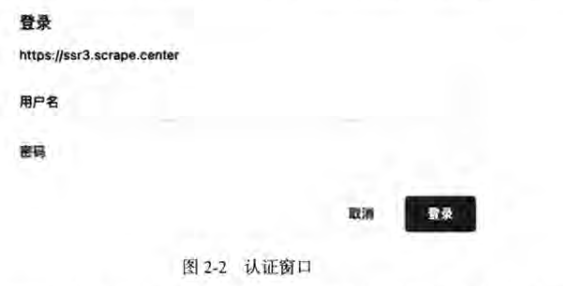

遇到这种情况,就表示这个网站启用了基本身份认证,英文叫作<b>HTTPBasic Access Authentication.</b>这是一种登录验证方式，允许网页浏览器或其他客户端程序在请求网站时提供用户名和口令形式的身份凭证。
那么爬虫如何请求这样的页面呢?借助 <b> HTTPBasicAuthHandler </b> 模块就可以完成，相关代码如下:

这里首先实例化了一个 <b>HTTPBasicAuthHandler</b> 
对象authhandler，其参数是 <b> HTTPPasswordMgrWithDefaultRealm </b> 对象，
它利用 <b> add_password </b> 方法添加用户名和密码，这样就建立了一个用来处理验证的 Handler类。
然后将刚建立的 <b> auth_handler </b> 类当作参数传入 
<b> build_opener </b>方法,构建一个Opener,这个Opener在发送请求时就相当于已经验证成功了。
最后利用 Opener 类中的 open方法打开链接，即可完成验证。这里获取的结果就是验证成功后的页面源码内容。


In [ ]:

from urllib.request import HTTPPasswordMgrWithDefaultRealm, HTTPBasicAuthHandler,build_opener 
from urllib.error import URLError

username = 'admin'
password ='admin'
url= "https://ssr3.scrape.center/"
p = HTTPPasswordMgrWithDefaultRealm()
p.add_password(None, url, username, password)
auth_handler = HTTPBasicAuthHandler(p)
opener = build_opener(auth_handler)
try:
    result= opener.open(url)
    html = result.read().decode('utf-8')
    print(html)
except URLError as e:
    print(e.reason)

<html lang="en">
<head>
  
  <meta charset="utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge">
  <meta name="viewport" content="width=device-width,initial-scale=1">
  <link rel="icon" href="/static/img/favicon.ico">
  <title>Scrape | Movie</title>
  

  <link href="/static/css/app.css" type="text/css" rel="stylesheet">
  
<link href="/static/css/index.css" type="text/css" rel="stylesheet">

</head>
<body>
<div id="app">
  <div data-v-74e8b908="" class="el-row" id="header">
    <div data-v-74e8b908="" class="container el-col el-col-18 el-col-offset-3">
      <div data-v-74e8b908="" class="el-row">
        <div data-v-74e8b908="" class="logo el-col el-col-4">
          <a data-v-74e8b908="" href="/" class="router-link-exact-active router-link-active">
            <img data-v-74e8b908="" src="/static/img/logo.png" class="logo-image">
            <span data-v-74e8b908="" class="logo-title">Scrape</span>
          </a>
        </div>
      </div>
    </div>
  </div>
  
<div dat


#### <b>代理</b>

做爬虫的时候，免不了要使用代理，如果要添加代理，可以这样做:

In [ ]:
from urllib.error import URLError
from urllib.request import ProxyHandler, build_opener
proxy_handler = ProxyHandler({
    'http':'http://127.0.0.1:8080',
    'https':'https://127.0.0.1:8080',
})
opener = build_opener(proxy_handler)
try:
    response=opener.open('https://www.baidu.com')
    print(response.read().decode('utf-8'))
except URLError as e:
    print(e.reason)

[Errno 111] Connection refused


#### <b>Cookie</b>

处理 Cookie 需要用到相关的 Handler。我们先用实例来看看怎样获取网站的Cookie，相关代码如下:

In [ ]:
import http.cookiejar, urllib.request
cookie = http.cookiejar.CookieJar()
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open('https://www.baidu.com')
for item in cookie:
    print(item.name +"="+ item.value)

#首先，必须声明一个Cookie]ar对象。然后需要利用HTTPCookieProcessor构建一个Handler，最后利用 build opener方法构建 Opener，执行 open 函数即可。


BAIDUID=58F6D611D03B7C7BBD69327F31A69B94:FG=1
BIDUPSID=58F6D611D03B7C7B1549F64325BE4D3A
PSTM=1745218629


既然能输出，那么可不可以输出文件格式的内容呢?我们知道Cookie 实际上也是以文本形式保存的。因此答案当然是肯定的，这里通过下面的实例来看看:

In [ ]:

import urllib.request, http.cookiejar
filename = 'cookie.txt'
cookie = http.cookiejar.MozillaCookieJar(filename)
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open("https://www.baidu.com")
cookie.save(ignore_discard=True, ignore_expires=True)


这时需要将Cookiejar 换成 MozillaCookiejar，它会在生成文件时用到，是 Cookiejar 的子类,可以用来处理跟 Cookie和文件相关的事件,例如读取和保存Cookie，可以将Cookie保存成Mozilla型浏览器的 Cookie 格式。
运行上面的实例之后，会发现生成了一个cookie.txt文件，该文件内容如下:

In [ ]:
import urllib .request, http.cookiejar
filename = 'cookie.txt'
cookie = http.cookiejar.LWPCookieJar(filename)
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open("https://www.baidu.com")
cookie.save(ignore_discard=True, ignore_expires=True)

In [ ]:
import urllib.request, http.cookiejar
cookie = http.cookiejar.LWPCookieJar()
cookie.load('cookie.txt',ignore_discard=True, ignore_expires=True)
handler = urllib.request.HTTPCookieProcessor(cookie)
opener = urllib.request.build_opener(handler)
response = opener.open("https://www.baidu.com")
print(response.read().decode('utf-8'))

<!DOCTYPE html>
<html>
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
    <meta content="always" name="referrer" />
    <meta
        name="description"
        content="全球领先的中文搜索引擎、致力于让网民更便捷地获取信息，找到所求。百度超过千亿的中文网页数据库，可以瞬间找到相关的搜索结果。"
    />
    <link rel="shortcut icon" href="//www.baidu.com/favicon.ico" type="image/x-icon" />
    <link
        rel="search"
        type="application/opensearchdescription+xml"
        href="//www.baidu.com/content-search.xml"
        title="百度搜索"
    />
    <title>百度一下，你就知道</title>
    <style type="text/css">
        body {
            margin: 0;
            padding: 0;
            text-align: center;
            background: #fff;
            height: 100%;
        }

        html {
            overflow-y: auto;
            color: #000;
            overflow: -moz-scrollbars;
            height: 100%;
        }

        body, input {
            font-size

### <b>2.异常处理</b>

我们已经了解了如何发送请求，但是在网络不好的情况下，如果出现了异常，该怎么办呢?这时
要是不处理这些异常，程序很可能会因为报错而终止运行，所以异常处理还是十分有必要的。urllib 库中的error模块定义了由equest 模块产生的异常。当出现问题时，request 模块便会抛出error模块中定义的异常

#### <b>URLError</b>

URLError类来自urllib库的error模块,继承自0SError类，是error异常模块的基类，由request模块产生的异常都可以通过捕获这个类来处理。
它具有一个属性 reason，即返回错误的原因。
下面用一个实例来看一下:

我们打开了一个不存在的页面，照理来说应该会报错，但是我们捕获了URLError这个异常，运行结果如下:

In [ ]:
from urllib import request, error
try:
    response = request.urlopen('https://cwigingcai.com/404')
except error.URLError as e:
    print(e.reason)

[Errno -2] Name or service not known


#### <b>HTTPEIrOI</b>

HTTPError是URLError的子类，专门用来处理HTTP请求错误，例如认证请求失败等。它有如下3个属性。
口code:返回HTTP状态码，例如404表示网页不存在，500表示服务器内部错误等口 reason:同父类一样，用于返回错误的原因。
口 headers:返回请求头。
下面我们用几个实例来看看:

In [ ]:
from urllib import request, error
try:
    response = request.urlopen("https://cuiqingcai.com/404")
except error.HTTPError as e:
    print(e.reason,e.code,e.headers, sep='\n')

Not Found
404
Connection: close
Content-Length: 9379
Server: GitHub.com
Content-Type: text/html; charset=utf-8
Access-Control-Allow-Origin: *
ETag: "64d39a40-24a3"
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'
x-proxy-cache: MISS
X-GitHub-Request-Id: B890:24B1FB:2E613CA:2ED4562:6805F227
Accept-Ranges: bytes
Date: Mon, 21 Apr 2025 07:23:03 GMT
Via: 1.1 varnish
Age: 47
X-Served-By: cache-sin-wsss1830034-SIN
X-Cache: HIT
X-Cache-Hits: 1
X-Timer: S1745220183.297884,VS0,VE2
Vary: Accept-Encoding
X-Fastly-Request-ID: 97556674fbd3fca3724ad11b8cffa7b97e415ef5




In [ ]:
import socket
from urllib import request, error

try:
    response = request.urlopen('https://cuiqingcai.com/404')
except error.HTTPError as e:
    print(e.reason, e.code, e.headers, sep='\n')
except error.URLEror as e:
    print(e.reason)
    # 有时候，reason属性返回的不一定是字符串，也可能是一个对象。再看下面的实例:
    if isinstance(e.reason, socket.timeout):
    # 这里我们直接设置超时时间来强制抛出timeout异常
        print('TIME OUT')
else:
    print('Request successfully')

Not Found
404
Connection: close
Content-Length: 9379
Server: GitHub.com
Content-Type: text/html; charset=utf-8
Access-Control-Allow-Origin: *
ETag: "64d39a40-24a3"
Content-Security-Policy: default-src 'none'; style-src 'unsafe-inline'; img-src data:; connect-src 'self'
x-proxy-cache: MISS
X-GitHub-Request-Id: B890:24B1FB:2E613CA:2ED4562:6805F227
Accept-Ranges: bytes
Age: 396
Date: Mon, 21 Apr 2025 07:28:52 GMT
Via: 1.1 varnish
X-Served-By: cache-sin-wsss1830072-SIN
X-Cache: HIT
X-Cache-Hits: 0
X-Timer: S1745220532.273072,VS0,VE1
Vary: Accept-Encoding
X-Fastly-Request-ID: 2e30e304388b0769125ff6d65d1a2718a7b23102




### <b>3.解析链接</b>
前面说过，urllib库里还提供了**parse**模块,这个模块定义了处理URL的标准接口,例如实现URL各部分的抽取、合并以及链接转换。它支持如下协议的URL处理:fle、fp、gopher、hdl、http、https、imap, mailto, mms, news , nntp, prospero, rsync , rtsp ,rtspu, sftp , sip,sips,snews, svn,svn+ssh .telnet和wais.

#### <b>urlparse</b>

该方法可以实现URL的识别和分段，这里先用一个实例来看一下:




In [ ]:
from urllib.parse import urlparse
result = urlparse('https://www,baidu.com/index.html;user?id=5#comment')
print(type(result))
print(result)


<class 'urllib.parse.ParseResult'>
ParseResult(scheme='https', netloc='www,baidu.com', path='/index.html', params='user', query='id=5', fragment='comment')


这里我们利用urlparse方法对一个URL进行了解析,然后输出了解析结果的类型以及结果本身运行结果如下:

<b>
<class 'urllib.parse.ParseResult'>
ParseResult(scheme='https', netloc='wmw,baidu.com', path='/index.html', params='user', query='id=5',fragment='comment'
</b>

可以看到，解析结果是一个ParseResult类型的对象，包含6部分，分别是scheme、netloc、path、params、query和fragment.

再观察一下上述实例中的 URL:

https://www.baidu.com/index.html;user?id=5#comment

可以发现，urlparse方法在解析URL,时有特定的分隔符。

例如://前面的内容就是scheme，代表协议。第一个/符号前面便是netloc，即域名;后面是path，即访问路径。分号;后面是params，代表参数。问号?后面是查询条件 query，一般用作 GET类型的URL。井号#后面是锚点 fragment,用于直接定位页面内部的下拉位置。

于是可以得出一个标准的链接格式，具体如下:

scheme://netloc/path;params?query#fragment

一个标准的URL都会符合这个规则，利用urlparse 方法就可以将它拆分开来。除了这种最基本的解析方式外，urlparse方法还有其他配置吗?接下来，看

一下它的API用法:urllib.parse.urlparse(urlstring, scheme='', allow fragments=true)

可以看到，urlparse方法有3个参数。

**urlstring**:这是必填项，即待解析的 URL。

**scheme**:这是默认的协议(例如htp或htps等)。如果待解析的 URL 没有带协议信息，就会将这个作为默认协议。我们用实例来看一下:

#### <b>urlunparse</b>
有了urlparse 方法，相应就会有它的对立方法urlunparse，用于构造URL。这个方法接收的参数是一个可迭代对象，其长度必须是6，否则会抛出参数数量不足或者过多的问题。先用一个实例看一下:


In [ ]:
from urllib.parse import urlunparse
data=['https','ww,baidu.com', 'index,htm', 'user','a=6','comment']
print(urlunparse(data))

https://ww,baidu.com/index,htm;user?a=6#comment


#### <b>urlsplit</b>

这个方法和 urlparse 方法非常相似，只不过它不再单独解析 params这一部分(params 会合并到path中)，只返回5个结果。实例如下:


In [ ]:
from urllib.parse import urlsplit
result = urlsplit("https://www.baidu.com/index.html;user?id=5#comment")
print(result)

SplitResult(scheme='https', netloc='www.baidu.com', path='/index.html;user', query='id=5', fragment='comment')


#### <b>urlunsplit</b>

与urlunparse方法类似，这也是将链接各个部分组合成完整链接的方法，传入的参数也是一个可迭代对象，例如列表、元组等，唯一区别是这里参数的长度必须为5。实例如下;


In [ ]:
from urllib.parse import urlunsplit
data= ['https','www,baidu.com','index,html','a=6','comment']
print(urlunsplit(data))

https://www,baidu.com/index,html?a=6#comment


#### <b>urljoin</b> 
urlunparse 和urlunsplit方法都可以完成链接的合并，不过前提都是必须有特定长度的对象，链接的每一部分都要清晰分开

除了这两种方法，还有一种生成链接的方法，是uljoin。我们可以提供一个base_url(基础链接)作为该方法的第一个参数，将新的链接作为第二个参数。

urlioin方法会分析baseurl的scheme、netloc和 path这3个内容，并对新链接缺失的部分进行补充，最后返回结果。

下面通过几个实例看一下:



In [ ]:
from urllib.parse import urljoin
print(urljoin('https://www.baidu.com','FAQ.html'))
print(urljoin('https://www.baidu.com','https://cuiqingcai.com/FAQ.html'))
print(urljoin('https://www.baidu,com/about.html', 'https://cuiqingcai.com/FAQ.html'))
print(urljoin('https://www.baidu.com/about.html', 'https://cuigingcai.com/FAQ.html?question=2'))
print(urljoin('https://www.baidu.com?wd=abc','https://cuiqingcai.com/index.php'))
print(urljoin('https://www.baidu.com','?category=2#comment'))
print(urljoin('www.baidu.com','?category-2#comment'))
print(urljoin('www.baidu.com#comment','?category-2'))

https://www.baidu.com/FAQ.html
https://cuiqingcai.com/FAQ.html
https://cuiqingcai.com/FAQ.html
https://cuigingcai.com/FAQ.html?question=2
https://cuiqingcai.com/index.php
https://www.baidu.com?category=2#comment
www.baidu.com?category-2#comment
www.baidu.com?category-2


#### <b>urlencode</b>  

这里我们再介绍一个常用的方法--urlencode，它在构造GET请求参数的时候非常有用，实例如下:


这里首先声明了一个字典 params，用于将参数表示出来，然后调用urlencode方法将params 序列化为GET请求的参数。
运行结果如下:

In [ ]:
from urllib.parse import urlencode
params = {'name': 'germey', 'age': 25 }
base_url="https://www,baidu.com?"
url = base_url + urlencode(params)
print(url)

https://www,baidu.com?name=germey&age=25



#### <b>parse_qs</b>  

有了序列化，必然会有反序列化。利用parseqs方法，可以将一串GET请求参数转回字典，实例如下:


In [ ]:
from urllib.parse import parse_qs

query = 'name=germey&age=25'
print(parse_qs(query))

{'name': ['germey'], 'age': ['25']}



#### <b>parse_qsl</b>  

**parse_qsl**方法用于将参数转化为由元组组成的列表，实例如下:

In [ ]:
from urllib.parse import parse_qsl
query = 'name=germey&age=25'
print(parse_qsl(query))

[('name', 'germey'), ('age', '25')]


#### <b>parse_qsl</b>  

该方法可以将内容转化为 URL编码的格式。当URL中带有中文参数时，有可能导致乱码问题、此时用 quote 方法可以将中文字符转化为 URL编码，实例如下:

In [ ]:
from urllib.parse import quote
keyword ='壁纸'
# 这里我们声明了一个中文的搜索文字，然后用 quote 方法对其进行 URL编码，最后得到的结果如下:
url="https://ww.baidu,com/s?wd="+ quote(keyword)
print(url)

https://ww.baidu,com/s?wd=%E5%A3%81%E7%BA%B8


#### <b>oquote</b>  

该方法可以将内容转化为 URL编码的格式。当URL中带有中文参数时，有可能导致乱码问题此时用 quote 方法可以将中文字符转化为URL编码，实例如下:


In [ ]:
from urllib.parse import quote
keyword = '壁纸'
url='https://ww.baidu,com/s?wd='+ quote(keyword)
print(url)
# 这里我们声明了一个中文的搜索文字，然后用 quote 方法对其进行 URL编码，最后得到的结果如下:

https://ww.baidu,com/s?wd=%E5%A3%81%E7%BA%B8


#### <b>unquote</b>  
有了quote 方法，当然就有unquote 方法，它可以进行URL解码，实例如下:

In [ ]:
from urllib.parse import unquote

url ='https://ww.baidu,com/s?wd=%E5%A3%81%E7%BA%B8'
print(unquote(url))
#这里的 ur1 是上面得到的 URL编码结果、利用 unguote 方法将其还原，结果如下:

https://ww.baidu,com/s?wd=壁纸


### <b>4.分析 Robots 协议</b> 

利用 urllib 库的 robotparser 模块，可以分析网站的 Robots 协议。我们再来简单了解一下这个模块的用法。

Robots 协议Robots协议也称作爬虫协议、机器人协议,全名为网络爬虫排除标准(RobotsExclusion Protocol),用来告诉爬虫和搜索引擎哪些页面可以

抓取、哪些不可以。它通常是一个叫作robots.xt 的文本文件,一般放在网站的根目录下

搜索爬虫在访问一个站点时，首先会检查这个站点根目录下是否存在robots.txt文件，如果存在，就会根据其中定义的爬取范围来爬取。如果没有找到这

个文件，搜索爬虫便会访问所有可直接访问的页面。

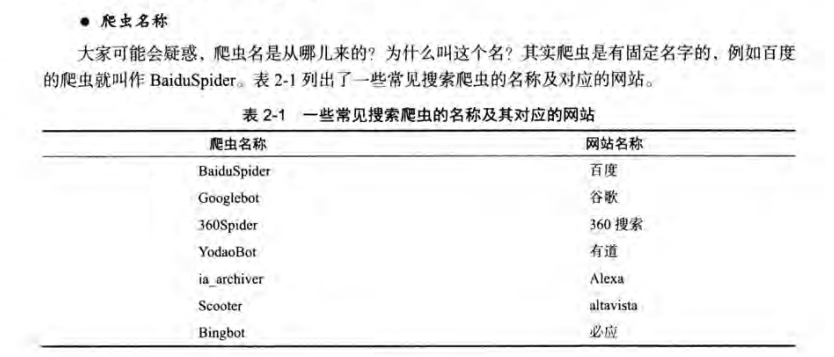

#### <b>URLError</b>

了解Robots协议之后，就可以使用robotparser模块来解析robots.txt 文件了。该模块提供了一个类 RobotFileParser，它可以根据某网站的

robots.txt 文件判断一个爬取爬虫是否有权限爬取这个网页。该类用起来非常简单,只需要在构造方法里传人robots.xt文件的链接即可。首先看一下它

的声明:urllib.robotparser.RobotFileParser(url="')

当然，也可以不在声明时传人robots.txt文件的链接，就让其默认为空，最后再使用seturl()方法设置一下也可以。

下面列出了 RobotFileParser 类的几个常用方法

**set_url**: 用来设置robots.txt文件的链接。如果在创建 RobotFileParser 对象时传入了链接,就不需要使用这个方法设置了。

**read**: 读取 robots.xt 文件并进行分析。注意，这个方法执行读取和分析操作，如果不调用这个方法，接下来的判断都会为false，所以一定记得调用这个方法。这个方法虽不会返回任何内容，但是执行了读取操作。

**parse**: 用来解析robots.txt文件，传人其中的参数是robots.txt 文件中某些行的内容，它会按照robots.txt的语法规则来分析这些内容。

**can_fetch**: 该方法有两个参数,第一个是User-Agent,第二个是要抓取的URL。返回结果是True或False，表示 User-Agent 指示的搜索引擎是否可以抓取这个 URL口mtime:返回上次抓取和分析robots.txt 文件的时间，这对于长时间分析和抓取 robots.txt 文件的搜索爬虫很有必要，你可能需要定期检查以抓取最新的robots.txt文件。口modified:它同样对长时间分析和抓取的搜索爬虫很有帮助，可以将当前时间设置为上次抓取和分析 robots.txt 文件的时间。

下面我们用实例来看一下:


In [ ]:
from urllib.robotparser import RobotFileParser
rp = RobotFileParser()
rp.set_url('https://www.baidu.com/robots.txt')
rp.read()
print(rp.can_fetch("Baiduspider", "https://www.baidu.com"))
print(rp.can_fetch("Baiduspider", "https://www.baidu.con/homepage/"))
print(rp.can_fetch("Googlebot", "https://www.baidu.com/homepage/"))

True
True
False


In [ ]:
#这里同样可以使用 parse 方法执行对robots.txt文件的读取和分析，实例如下:

from urllib.request import urlopen
from urllib.robotparser import RobotFileParser

rp = RobotFileParser()
rp.parse(urlopen('https://www.baidu.com/robots.txt').read().decode('utf-8').split('\n'))

print(rp.can_fetch("Baiduspider", "https://www.baidu.com"))
print(rp.can_fetch("Baiduspider", "https://www.baidu.con/homepage/"))
print(rp.can_fetch("Googlebot", "https://www.baidu.com/homepage/"))




True
True
False


### <b>5. 总结</b>

本节内容比较多，我们介绍了urlib库的request、error、parse、robotparser 模块的基本用法,这些是一些基础模块，有一些模块的实用性还是很强的，例如我们可以利用parse 模块来进行URL的各种处理，还是很方便的。